In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycatch22 as ct

In [51]:
# HR data that you sent me
HR =pd.read_csv("HR.csv")

<AxesSubplot:>

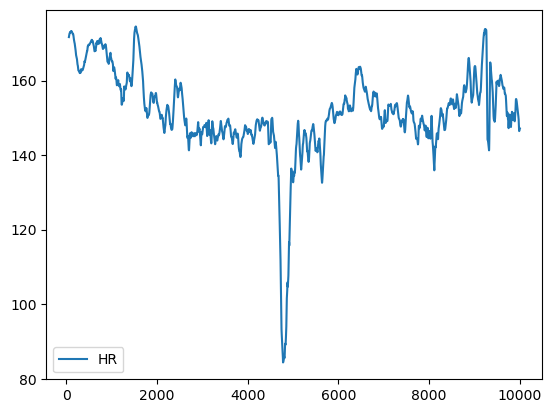

In [241]:
HR.dropna(inplace=True)
# plot of the mean with a rolling window of 60 and the first 10000 points
rolling_means = HR.rolling(window=60).mean()
rolling_means.head(10000).plot()

In [147]:
# catch22 feature names
ctnames= ['DN_HistogramMode_5',
  'DN_HistogramMode_10',
  'CO_f1ecac',
  'CO_FirstMin_ac',
  'CO_HistogramAMI_even_2_5',
  'CO_trev_1_num',
  'MD_hrv_classic_pnn40',
  'SB_BinaryStats_mean_longstretch1',
  'SB_TransitionMatrix_3ac_sumdiagcov',
  'PD_PeriodicityWang_th0_01',
  'CO_Embed2_Dist_tau_d_expfit_meandiff',
  'IN_AutoMutualInfoStats_40_gaussian_fmmi',
  'FC_LocalSimple_mean1_tauresrat',
  'DN_OutlierInclude_p_001_mdrmd',
  'DN_OutlierInclude_n_001_mdrmd',
  'SP_Summaries_welch_rect_area_5_1',
  'SB_BinaryStats_diff_longstretch0',
  'SB_MotifThree_quantile_hh',
  'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'SP_Summaries_welch_rect_centroid',
  'FC_LocalSimple_mean3_stderr']

In [232]:

# this loop creates different rolling window dataframes with different window sizes
windows = {}
windowsize = [60,120,180,240,300,360,420]

for j in windowsize:
    rolling_windows = []
    for i in HR.rolling(window=j):
        if len(i.dropna()) == j:  
            rolling_windows.append(i)
    windows[j] = rolling_windows

In [233]:
# Initialize a nested dictionary to store features for each window size
feats = {window_size: [] for window_size in windows}

# Iterate over each window size in the windows dictionary
for window_size in windows:
    # Iterate over the windows of the current window size
    for i in range(len(windows[window_size])):
        # Compute features for the current window and append to the nested dictionary
        feats[window_size].append(ct.catch22_all(list(windows[window_size][i]["HR"]))["values"])


In [234]:
# creates a list of data frames for each window size
dfs = []
for i in windowsize:
    df = pd.DataFrame(feats[i],columns = ctnames)
    dfs.append(df)

C:\Users\colek\AppData\Local\Temp\ipykernel_21232\2183845235.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


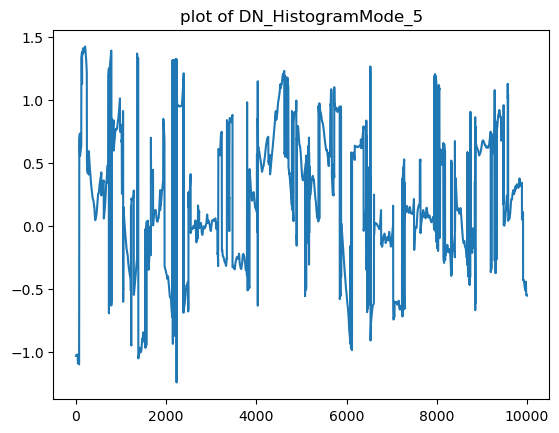

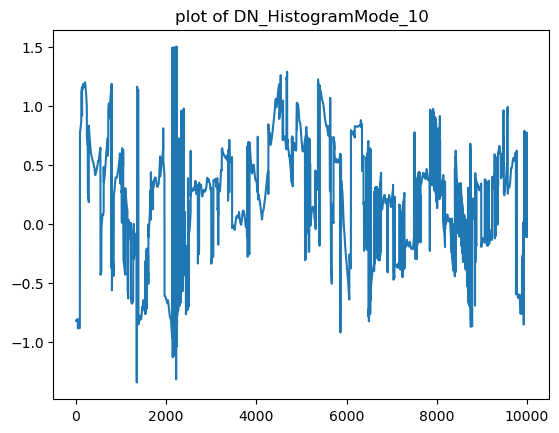

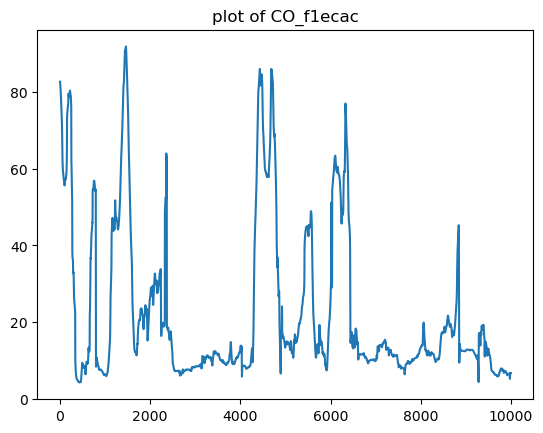

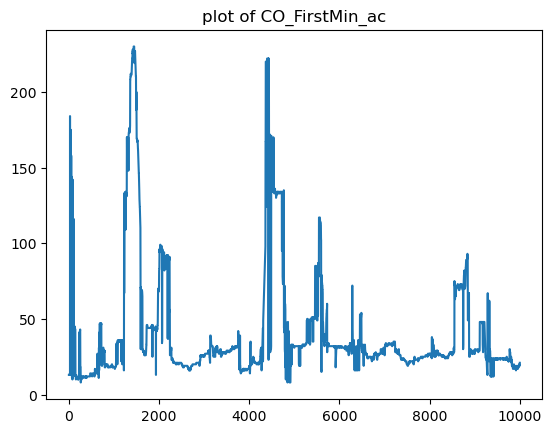

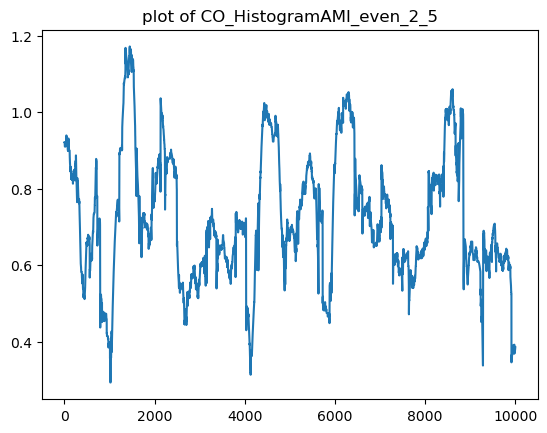

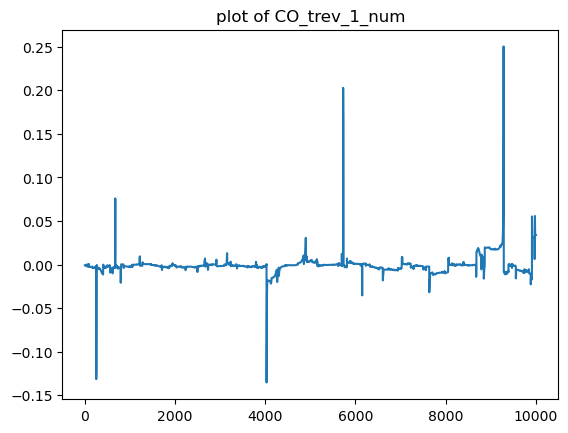

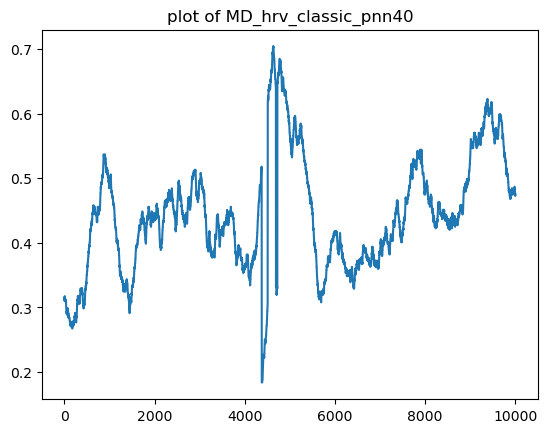

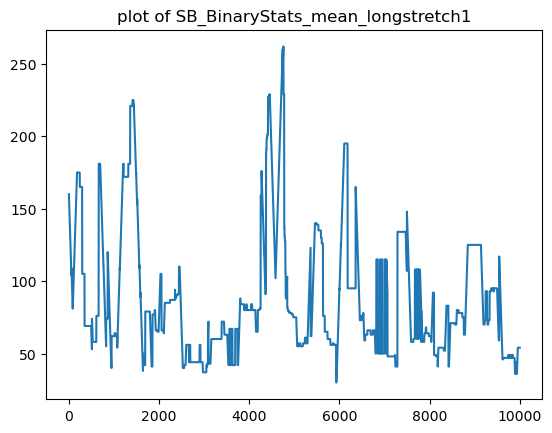

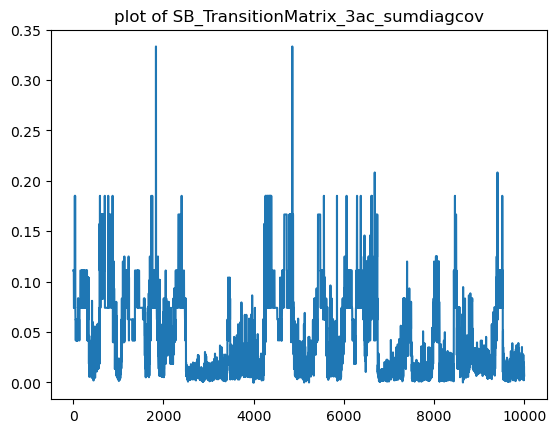

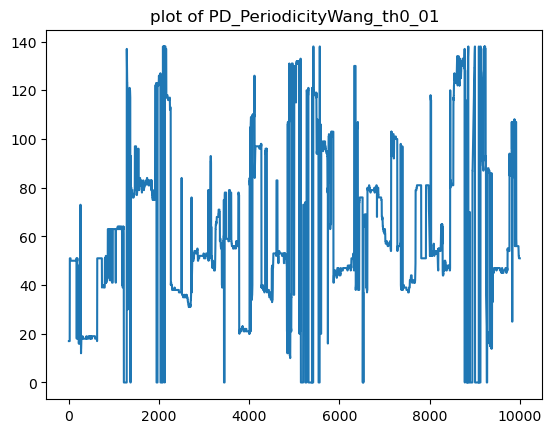

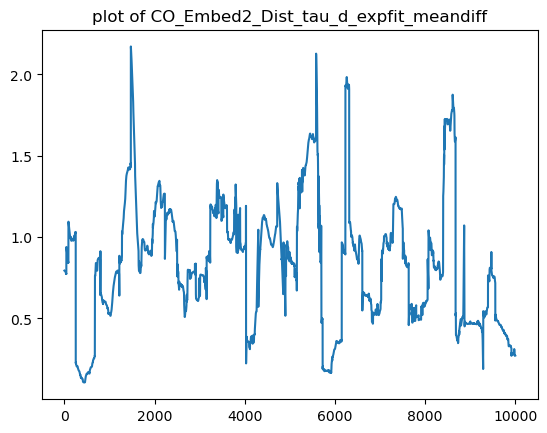

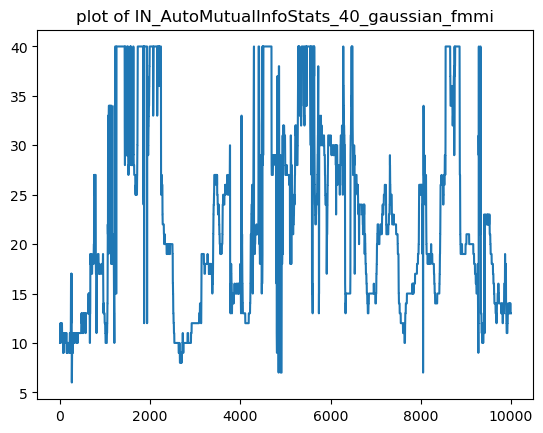

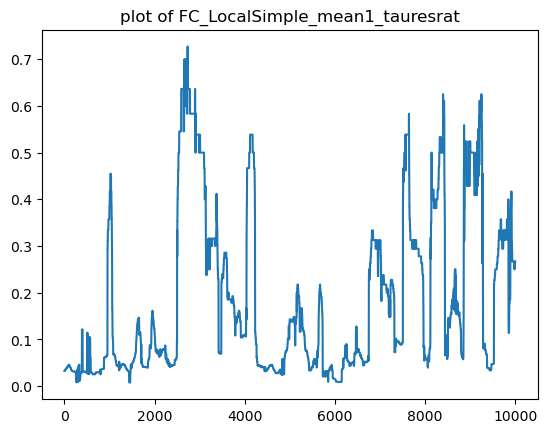

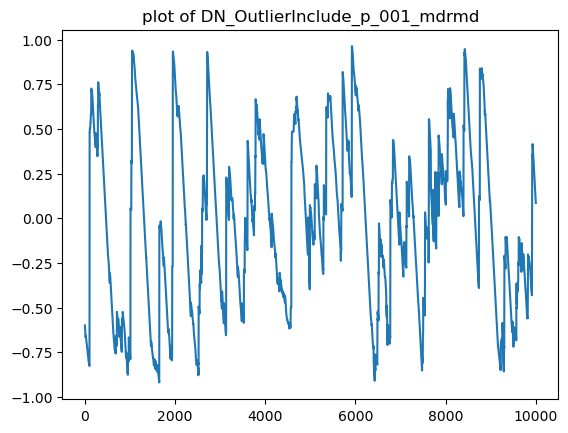

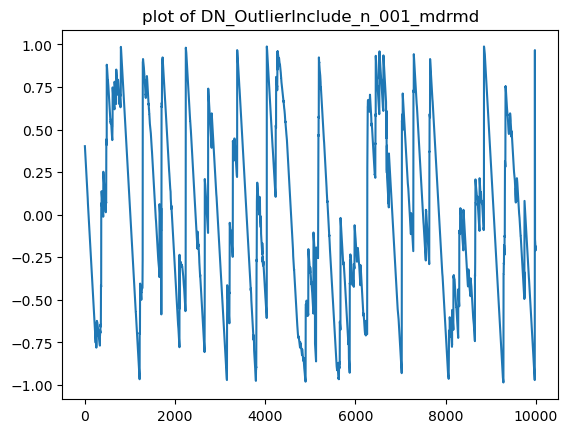

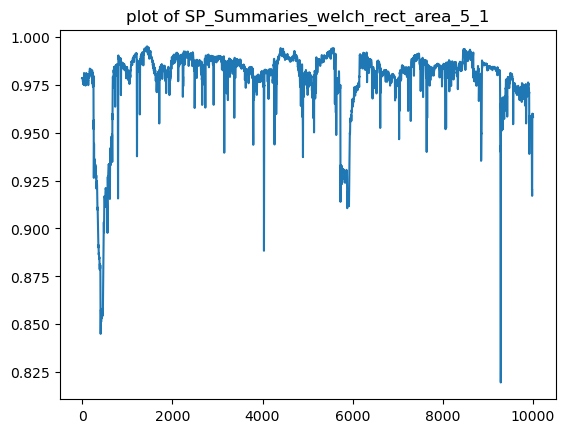

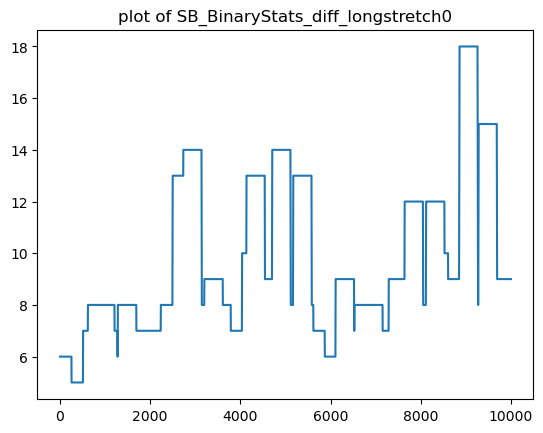

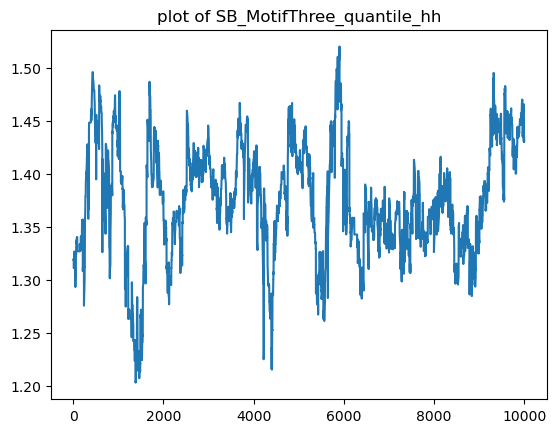

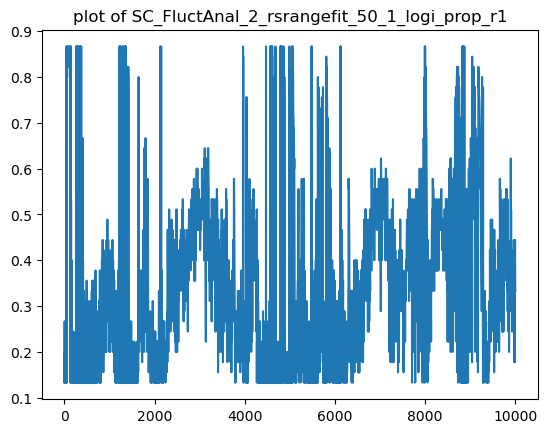

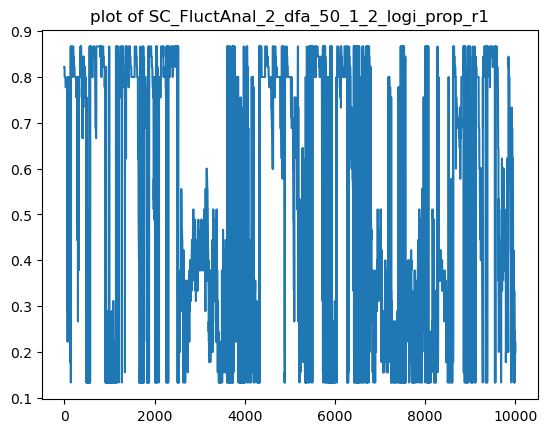

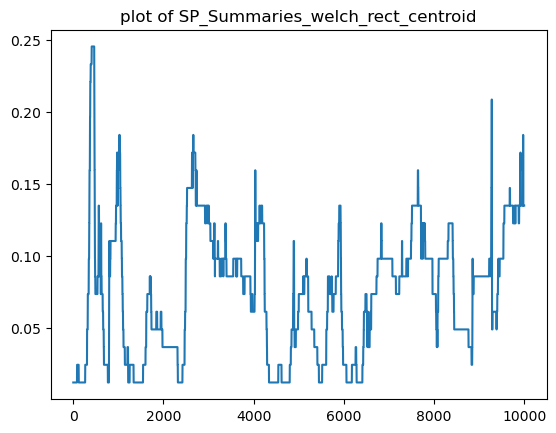

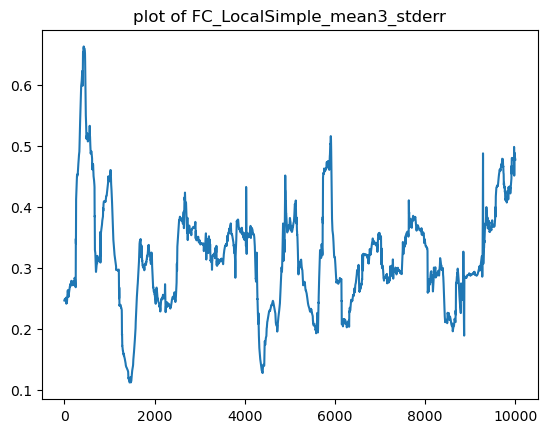

In [242]:
#All features plotted for a window of 1 minute

for col in dfs[0].columns:
    plt.figure()
    df[col].head(10000).plot()
    plt.title(f"plot of {col}")

C:\Users\colek\AppData\Local\Temp\ipykernel_21232\387619764.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


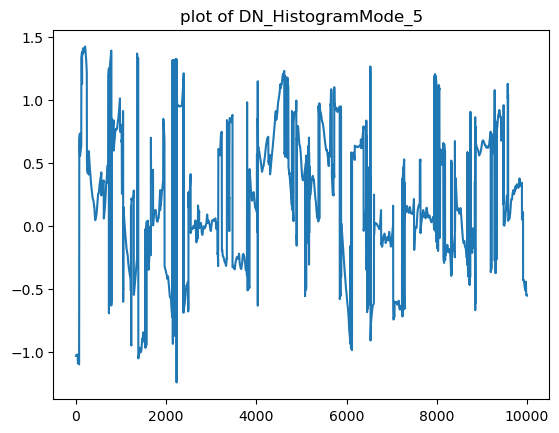

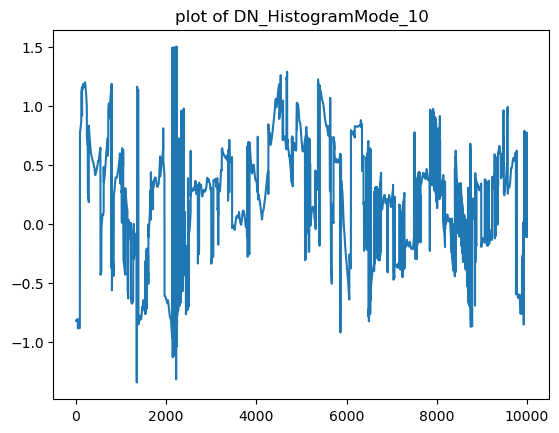

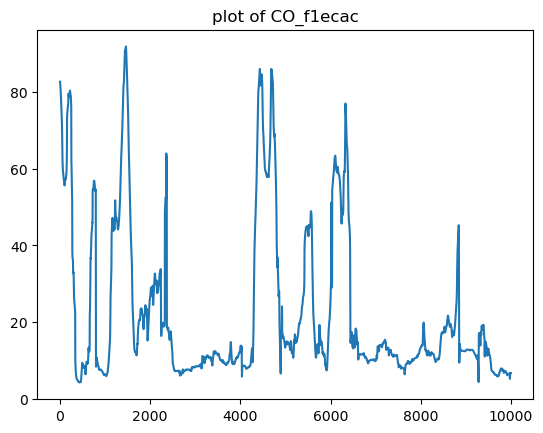

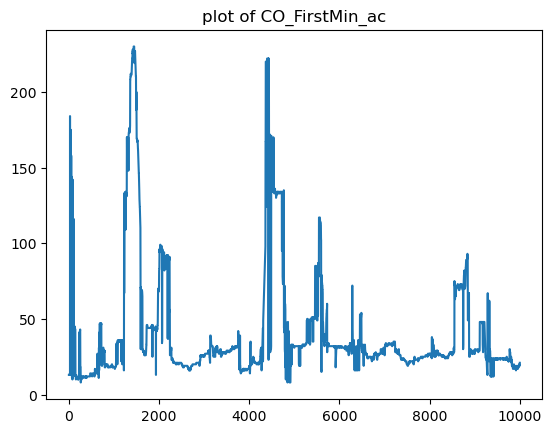

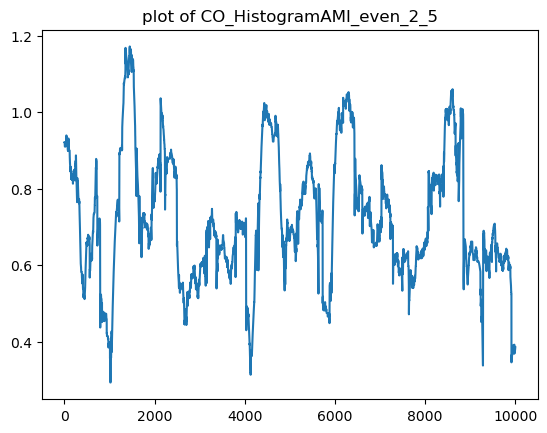

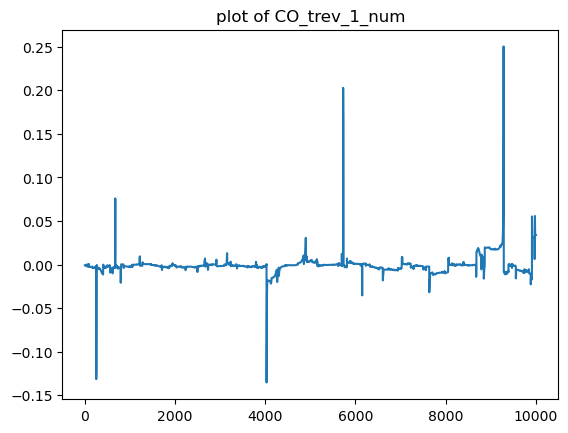

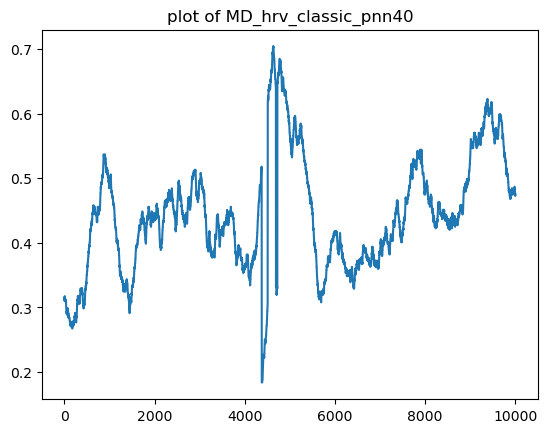

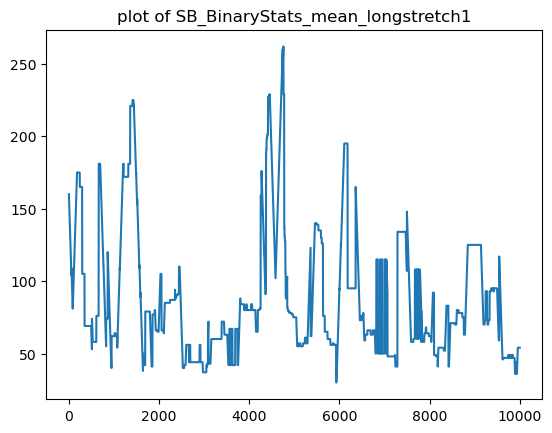

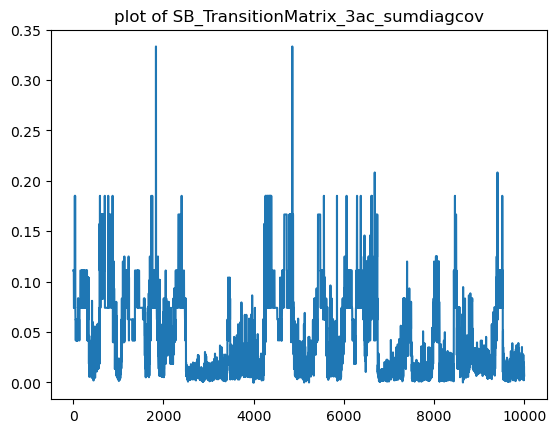

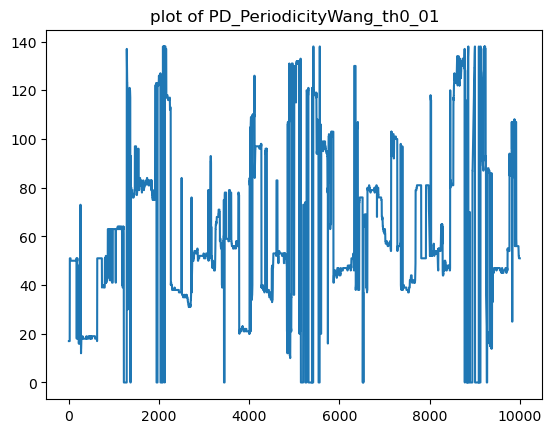

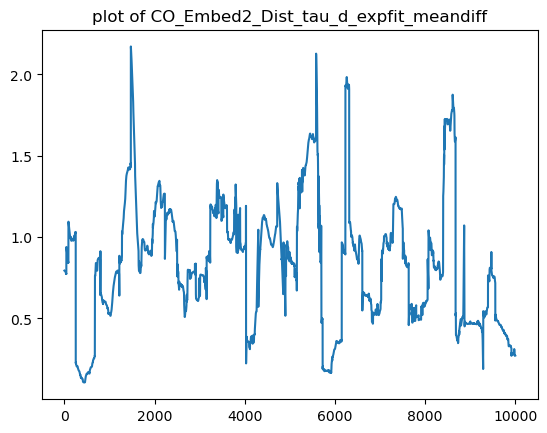

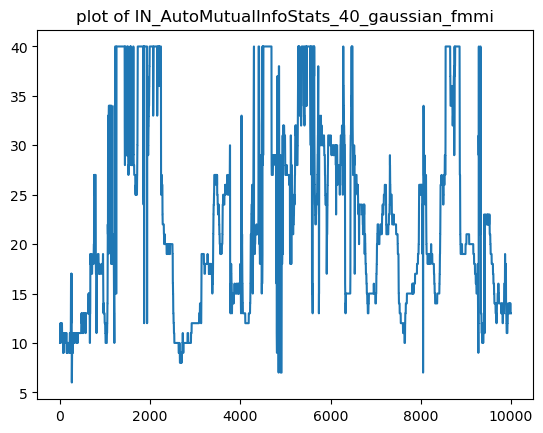

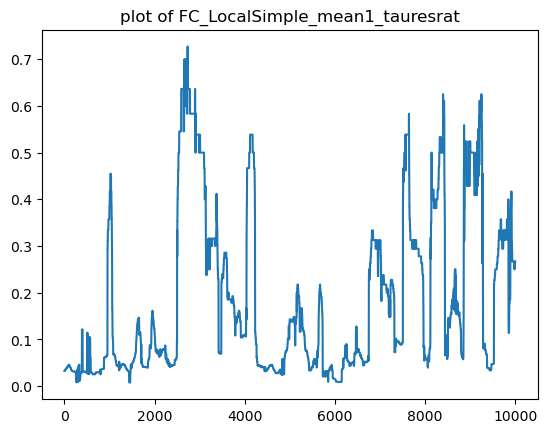

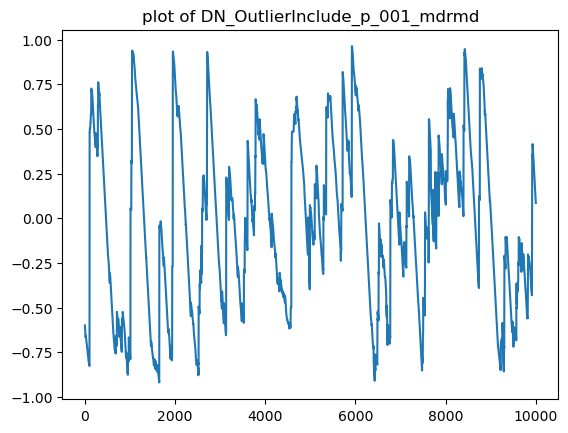

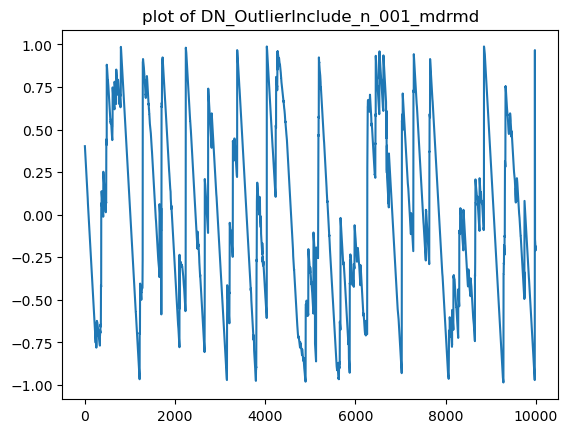

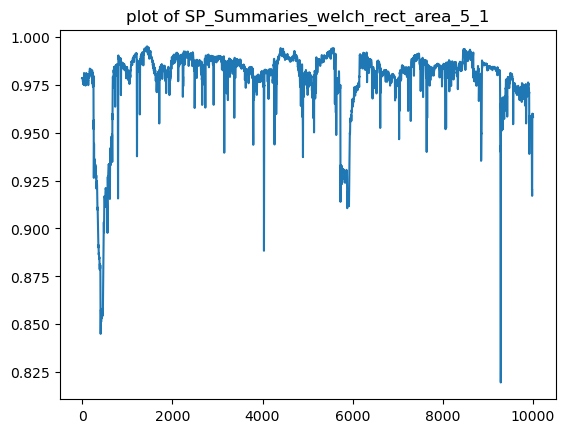

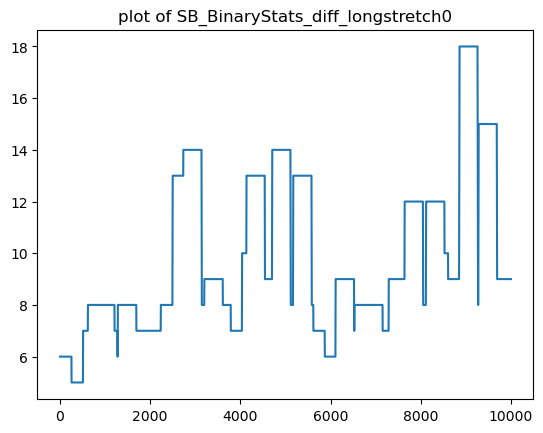

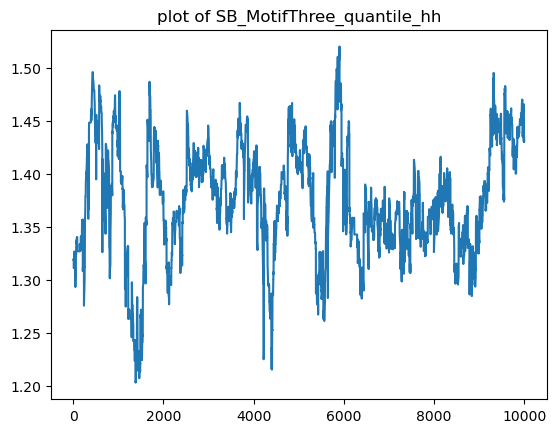

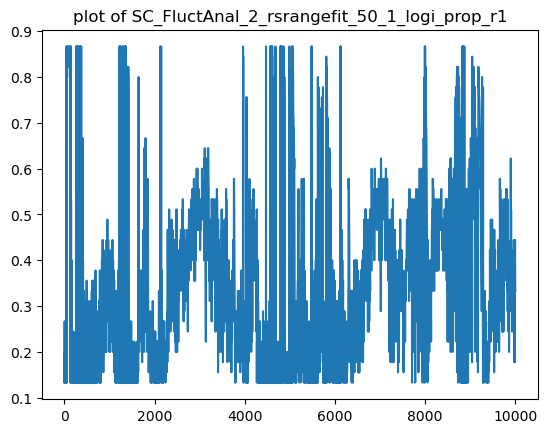

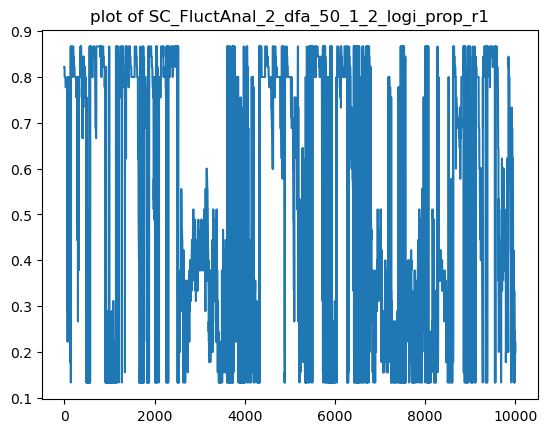

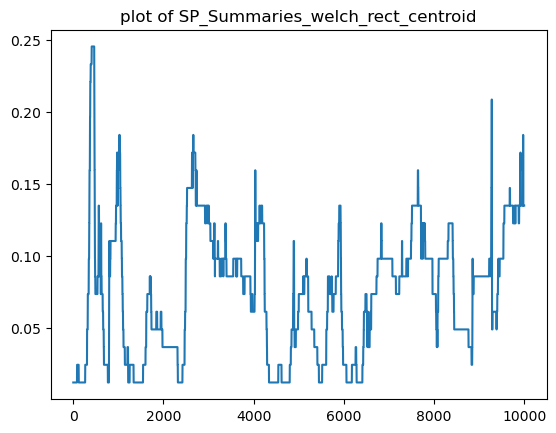

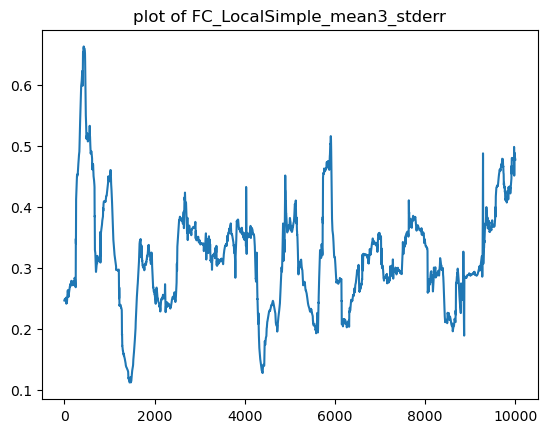

In [243]:
#All features plotted for a window of 2 minutes

for col in dfs[1].columns:
    plt.figure()
    df[col].head(10000).plot()
    plt.title(f"plot of {col}")

<AxesSubplot:>

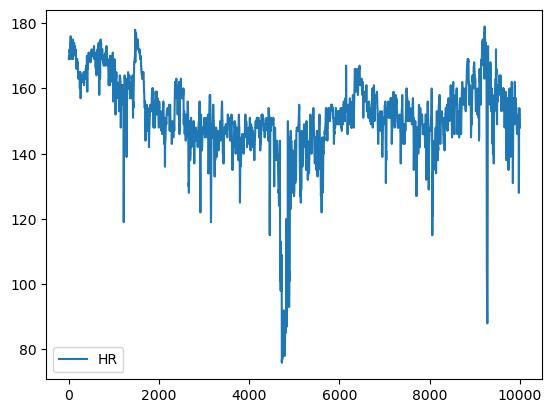

In [244]:
# the HR values plotted for reference
HR.head(10000).plot()